# DJIA 30 Stock Time Series dataset
The script used to acquire all of the following data can be found in this GitHub repository. This repository also contains the modeling codes and will be updated continually, so welcome starring or watching!

Stock market data can be interesting to analyze and as a further incentive, strong predictive models can have large financial payoff. The amount of financial data on the web is seemingly endless. A large and well structured dataset on a wide array of companies can be hard to come by. Here provided a dataset with historical stock prices (last 12 years) for 29 of 30 DJIA companies (excluding 'V' because it does not have the whole 12 years data).

      ['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'XOM', 'GE',

      'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PFE',

      'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'WMT', 'GOOGL', 'AMZN', 'AABA']

#### Content
The data is presented in a couple of formats to suit different individual's needs or computational limitations.
I have included files containing 13 years of stock data (in the all_stocks_2006-01-01_to_2018-01-01.csv and corresponding folder) and
a smaller version of the dataset (all_stocks_2017-01-01_to_2018-01-01.csv) with only the past year's stock data for those wishing to use something more manageable in size.

The folder individual_stocks_2006-01-01_to_2018-01-01 contains files of data for individual stocks, labelled by their stock ticker name.
The all_stocks_2006-01-01_to_2018-01-01.csv and all_stocks_2017-01-01_to_2018-01-01.csv contain this same data, presented in merged .csv files.
Depending on the intended use (graphing, modelling etc.) the user may prefer one of these given formats.

All the files have the following columns:
Date - in format: yy-mm-dd

Open - price of the stock at market open (this is NYSE data so all in USD)

High - Highest price reached in the day

Low Close - Lowest price reached in the day

Volume - Number of shares traded

Name - the stock's ticker name

In [7]:
!pip3 install kaggle

# Read Data From Kaggle

## Kaggle setup

    On your Kaggle account, under API, select "Create New API Token" and kaggle.json will be downloaded on your computer.

    Go to directory — "${user.home}\.kaggle\" — and move here the downloaded JSON file.

In [8]:
from kaggle.api.kaggle_api_extended import KaggleApi

k_api = KaggleApi()
k_api.authenticate()

In [9]:
from zipfile import ZipFile
import os
import shutil
from zipfile import ZipFile

os.makedirs('./.data/djia-stock-2005-2017', exist_ok = True)

if not os.path.exists('./.data/stock-time-series-20050101-to-20171231.zip'):
    #downloading datasets
    k_api.dataset_download_files(
        dataset='szrlee/stock-time-series-20050101-to-20171231',
        unzip=False
    )
    shutil.move('./stock-time-series-20050101-to-20171231.zip', './.data')

    zf = ZipFile('./.data/stock-time-series-20050101-to-20171231.zip')
    zf.extractall('./.data/djia-stock-2005-2017/') 
    zf.close()

root_dir = './.data/djia-stock-2005-2017'

#### Import the dataset - 'IBM_2006-01-01_to_2018-01-01.csv'

In [10]:
import os
import pandas as pd

IBM_data_path = os.path.join(root_dir, 'IBM_2006-01-01_to_2018-01-01.csv')
ibm_df = pd.read_csv(IBM_data_path)
ibm_df.head(5)


,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
1,2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2,2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
3,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
4,2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


#### Perform EDA on the dataset to understand the data.

In [11]:
print(ibm_df.shape[0])

print(ibm_df.isna().sum())

print(ibm_df[ibm_df["Open"].isna()])

ibm_df = ibm_df.dropna()
print(ibm_df.isna().sum())

3020
Date      0
Open      1
High      0
Low       1
Close     0
Volume    0
Name      0
dtype: int64
            Date  Open    High  Low   Close   Volume Name
2913  2017-07-31   NaN  144.93  NaN  144.67  4355718  IBM
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64


In [12]:
import pandas as pd

print(ibm_df["Date"].dtype)
ibm_df['Date'] = pd.to_datetime(ibm_df['Date'])
print(ibm_df["Date"].dtype)
ibm_df.head()

object
datetime64[ns]


,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
1,2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2,2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
3,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
4,2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


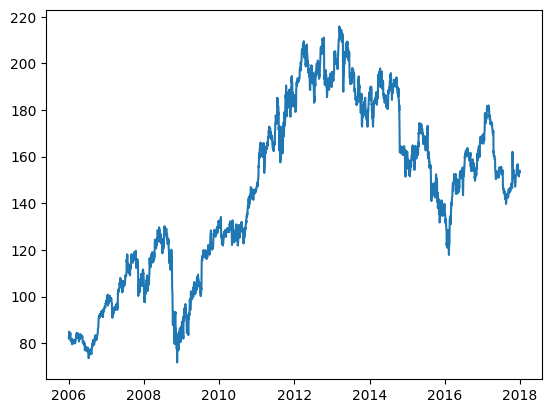

In [13]:
import matplotlib.pyplot as plt
plt.plot('Date', 'Close', data=ibm_df)

## Extract the information to train the model from the dataset.

In [14]:
import numpy as np

class MinMaxScaler:
    def __init__(self, dataset):
        self.min = np.min(dataset)
        self.max = np.max(dataset)
    
    def std(self, dataset):
        distance = self.max - self.min
        return np.vectorize(lambda x: (x - self.min) / distance)(dataset)
    
    def scale(self, dataset):
        distance = self.max - self.min
        return np.vectorize(lambda x: x * distance + self.min)(dataset)

In [15]:
import numpy as np

ibm_close_dataset = ibm_df['Close'].to_numpy()
print(
    "Size is", ibm_close_dataset.shape[0], 
    "Min is ", np.min(ibm_close_dataset),
    "Max is ", np.max(ibm_close_dataset))

mm_scaler = MinMaxScaler(ibm_close_dataset)
norm_dataset  = mm_scaler.std(ibm_close_dataset)
print(
    "Size is", norm_dataset.shape[0], 
    "Min is ", np.min(norm_dataset),
    "Max is ", np.max(norm_dataset))

seq_length = 15
train_size = int(norm_dataset.shape[0]//seq_length*0.7*seq_length)
test_size = norm_dataset.shape[0] - train_size

train_dataset = norm_dataset[:train_size]
test_dataset  = norm_dataset[train_size:]
print(
    "Train Size", train_dataset.shape,
    "Test Size", test_dataset.shape
)

Size is 3019 Min is  71.74 Max is  215.8
Size is 3019 Min is  0.0 Max is  1.0
Train Size (2110,) Test Size (909,)


# Train the RNN model.

## Define Model with Forward & Backward pass

Notation:
- H is hidden state
- X is input
- O_hat is predicted output
- O is actual output
- W_h, W_x, W_o are weights suffixed with their corresponding multipliers
- B_h and B_o are bias for hidden state and output linear computation
- J is cost function (square of residual)
- J_sum is cummulative cost (sum of square of residual)
- t is the time/step

Forward pass:
- H_raw[t] = W_h . H[t-1] + W_x . X_t + B_h
- H[t] = tanh( H_raw[t] )
- O_hat[t] = W_o . H[t] + B_o
- diff[t] = O[t] - O_hat[t]
- J[t] = (diff[t]) ** 2
- J_sum = sum(J)

Backward pass (refer to the image below which depicts the computation):
- dJ_sum = 1
- dJ[t] = dJ_sum . 1
- dO_hat[t] = 2 * diff[t] . ddiff_dOhat . dJ[t]
-           = -2 . (O[t] - O_hat[t]) . dJ[t]
- dB_o = sum(dO_hat)
- dW_o = sum(temp) where temp[t] = dO_hat[t] . transpose(H[t])
- dH[t] = transpose(W_o) . dO_hat[t]
- dH_raw[t] = (1 - H[t]**2) . ( dH[t] + transpose(W_h) . dH_raw[t+1] )
- dB_h = sum(dH_raw)
- dW_h = sum(temp) where temp = dH_raw[t] . transpose(H[t-1])
- dW_x = sum(temp) where temp = dH_raw[t] . transpose(X[t])

Note: 
- when t = 0, H[t-1] is H_s which is 0 (or from prev pass) 
- when t = N (i.e. input length), dH_raw[t+1] is 0 when t = N

Computation graph with forward and back passes (N = 2, i.e t = 0 & t = 1)
![vanilla rnn comp graph](./comp_graph_vanilla_rnn_1.jpg)

In [16]:

import numpy as np

class VanillaRNN:
    def __init__(self, io_dim=1, hidden_dim=100):
        self.io_dim = io_dim
        self.hidden_dim = hidden_dim
        
        self.H_prev = np.zeros((hidden_dim, io_dim)) * 0.01
        self.W_x = np.random.randn(hidden_dim, io_dim) * 0.01
        self.W_h = np.random.randn(hidden_dim, hidden_dim) * 0.01
        self.B_h = np.random.randn(hidden_dim, io_dim) * 0.01
        
        self.W_o = np.random.randn(io_dim, hidden_dim) * 0.01
        self.B_o = np.random.randn(io_dim, io_dim) * 0.01
        
        ## for adagrad momentum term
        self.grad_sacc = [
            np.zeros_like(self.W_x), 
            np.zeros_like(self.W_h), 
            np.zeros_like(self.B_h), 
            np.zeros_like(self.W_o), 
            np.zeros_like(self.B_o)
        ]
    
    def reset_hidden_state(self):
        self.H_prev = np.zeros((self.hidden_dim, self.io_dim))
    
    def predict(self, X_seed, num_predictions):
        o_hat = []
        h = self.H_prev
        x = X_seed
        for _ in range(num_predictions):
            h = np.tanh(np.dot(self.W_x, x) + np.dot(self.W_h, h) + self.B_h)
            o = np.dot(self.W_o, h) + self.B_o
            o_hat.append(o)
            x = o
        return o_hat
    
    def forward(self, X, O):
        # H_raw[t] = W_h . H[t-1] + W_x . X_t + B_h
        # H[t] = tanh( H_raw[t] )
        # O_hat[t] = W_o . H[t] + B_o
        # J[t] = (O[t] - O_hat[t]) ** 2
        # J_sum = sum(J)

        # do forward pass
        local_h_prev = self.H_prev
        H_raw, H, O_hat, J = [], [local_h_prev], [], []
        J_sum = 0
        N = len(X)
        for t in range(N):
            H_raw.append(np.dot(self.W_x, X[t]) + np.dot(self.W_h, local_h_prev) + self.B_h)
            H_cur = np.tanh(H_raw[t])
            H.append(H_cur)
            O_hat.append(np.dot(self.W_o, H_cur) + self.B_o)
            J.append((O[t] - O_hat[t])**2)
            J_sum += J[t].item(0)
            local_h_prev = H_cur
        
        self.H_prev = local_h_prev
        self.mem = (X, H_raw, H, O_hat, O, J, J_sum)
        
        return J_sum, O_hat
    
    def backward(self):
        # dJ_sum = 1
        # dJ[t] = dJ_sum
        # dO_hat[t] = 2 * ( transpose(O[t] - O_hat[t]) . dJ[t] )
        # dB_o = sum(dO_hat)
        # dW_o = sum(temp) where temp[t] = dO_hat[t] . transpose(H[t])
        # dH[t] = transpose(W_o) . dO_hat[t]
        # dH_raw[t] = (1 - H[t]**2) . ( dH[t] + transpose(W_h) . dH_raw[t+1] )
        # dB_h = sum(dH_raw)
        # dW_h = sum(temp) where temp = transpose(H[t-1]) . dH_raw[t]
        # dW_x = sum(temp) where temp = transpose(X[t]) . dH_raw[t]
        # do backward pass
        X, H_raw, H, O_hat, O, J, J_sum = self.mem
        
        dB_o = np.zeros(self.B_o.shape)
        dW_o = np.zeros(self.W_o.shape)
        dB_h = np.zeros(self.B_h.shape)
        dW_h = np.zeros(self.W_h.shape)
        dW_x = np.zeros(self.W_x.shape)
        
        N = len(X)
        
        H_iter = reversed(H)
        H_cur = next(H_iter)
        dH_raw_next = np.zeros(H_raw[0].shape)
        dJ_sum = np.array([[1]])
        for t in reversed(range(N)):
            H_prev = next(H_iter)
            
            dJ = dJ_sum
            #error[t] = O[t] - O_hat[t]
            #J[t] = (error[t]) ** 2
            #dJ_dOhat = 2 * error[t] * derror_dohat
            #derror_dohat = 0 - 1 = -1
            dO_hat = 2 * (O[t] - O_hat[t]) * -1 * dJ
            
            # O_hat[t] = W_o . H[t] + B_o
            dB_o = dB_o + dO_hat
            dW_o = dW_o + np.dot(dO_hat, H_cur.T)
            dH = np.dot(self.W_o.T, dO_hat)
            
            # H[t] = tanh( H_raw[t] )
            dH_raw_temp = 1 - H_cur * H_cur
        
            # H_raw[t] = W_h . H[t-1] + W_x . X_t + B_h
            dH_raw =dH_raw_temp * (dH + np.dot(self.W_h.T, dH_raw_next))
            dB_h = dB_h + dH_raw
            dW_h = dW_h + np.dot(dH_raw, H_prev.T)
            dW_x = dW_x + np.dot(dH_raw, X[t].T)
            
            dH_raw_next = dH_raw
            H_cur = H_prev
        
        # Uncomment if required
        for dparam in [dW_x, dW_h, dB_h, dW_o, dB_o]:
            np.clip(dparam, -5, 5, out=dparam)
        
        self.gradients = [dW_x, dW_h, dB_h, dW_o, dB_o]
    
    def step(self, learn_rate=0.001, epsilon=10e-8):
        ## SGD
        self.W_x = self.W_x - learn_rate * self.gradients[0]
        self.W_h = self.W_h - learn_rate * self.gradients[1]
        self.B_h = self.B_h - learn_rate * self.gradients[2]
        self.W_o = self.W_o - learn_rate * self.gradients[3]
        self.B_o = self.B_o - learn_rate * self.gradients[4]
        
        ## auto grad
        dw_avg = [] ## auto grad mometum
        for i in range(len(self.gradients)):
            self.grad_sacc[i] +=  self.gradients[i] ** 2
            dw_avg.append(self.gradients[i] / np.sqrt(self.grad_sacc[i]+epsilon))
            
        # self.W_x = self.W_x - learn_rate * dw_avg[0]
        # self.W_h = self.W_h - learn_rate * dw_avg[1]
        # self.B_h = self.B_h - learn_rate * dw_avg[2]
        # self.W_o = self.W_o - learn_rate * dw_avg[3]
        # self.B_o = self.B_o - learn_rate * dw_avg[4]

In [40]:
import torch

class VanillaRNNTorch(torch.nn.Module):
    
    def __init__(self, io_dim: int = 1, hidden_dim: int = 100):
        super().__init__()
        self.io_dim = io_dim
        self.hidden_dim = hidden_dim
        
        self.i2h = torch.nn.Linear(in_features=io_dim, out_features=hidden_dim)
        self.h2h = torch.nn.Linear(in_features=hidden_dim, out_features=hidden_dim)
        self.h2O = torch.nn.Linear(in_features=hidden_dim, out_features=io_dim)
    
    def forward(self, X, H_prev):
        Z_x = self.i2h(X)
        Z_h = self.h2h(H_prev)
        H = torch.tanh(Z_x + Z_h)
        Y_hat = self.h2O(H)
        
        return Y_hat, H.detach()
    
    def init_hidden_state(self):
        return torch.zeros(1, self.hidden_dim, requires_grad=False)

In [37]:
#test the network with toy example
testnet = VanillaRNN(io_dim=1, hidden_dim=2)

#TODO: add deterministic initial weights & 
#   compare the grads & updates with by hand calculation 

X = np.array([[0.1], [0.2], [0.3]]).reshape(-1, 1, 1)
Y = np.array([[0.2], [0.3], [0.4]]).reshape(-1, 1, 1)

loss, Y_pred = testnet.forward(X, Y)
testnet.backward()
testnet.step()
print(loss, Y_pred)

y_pred = testnet.predict(np.array([0.1]).reshape(-1,  1), 3)
print(y_pred)


0.26502786916026844 [array([[0.01421778]]), array([[0.01421141]]), array([[0.01420509]])]
[array([[0.01593266]]), array([[0.01593798]]), array([[0.01593798]])]


## Train the model using VanillaRNN

In [84]:
def train(net, data, learn_rate):
    i = 0
    losses = list()
    epoch_loss = 0
    num_iterations = 0
    while i+1+seq_length < len(data):
        train_X = data[i:i+seq_length].reshape(-1, 1, 1)
        train_Y = data[i+1:i+1+seq_length].reshape(-1, 1, 1)
        
        loss, _ = net.forward(train_X, train_Y)
        net.backward()
        net.step(learn_rate)
        
        i = i + seq_length
        losses.append(loss / train_X.shape[0])
        epoch_loss += loss
        num_iterations += 1
    
    return epoch_loss, np.mean(losses)

def test(net, dataX, dataY):
    loss = 0
    y_hat = []
    for i in range(len(dataX)):
        X = dataX[i]
        y_pred = net.predict(X.reshape(-1, 1), seq_length)[seq_length-1]
        if i+15 < len(dataY):
            y_actual = dataY[i]
            loss += y_actual - y_pred
        y_hat.append(np.squeeze(y_pred, axis=1))
    
    return y_hat, loss, loss/len(dataY)

In [38]:
# seq_length
# train_dataset, test_dataset

model = VanillaRNN(io_dim=1, hidden_dim=256)

learn_rate = 0.001
max_epochs = 100

for epoch in range(1, max_epochs+1):
    i = 0
    #model.reset_hidden_state()
    epoch_loss, mean_loss = train(model, train_dataset, learn_rate)
    
    if epoch%10 == 0:
        print("epoch# {}: total_loss={} mean_loss={}".format(epoch, epoch_loss, mean_loss))

train_loss, train_predict = test(model, train_dataset)
test_loss, test_predict = test(model, test_dataset)

epoch# 10: total_loss=2.6706380978141544 mean_loss=0.0012717324275305488
epoch# 20: total_loss=0.5766366257945197 mean_loss=0.0002745888694259618
epoch# 30: total_loss=0.5693294114525962 mean_loss=0.0002711092435488553
epoch# 40: total_loss=0.5625261005401629 mean_loss=0.00026786957168579187
epoch# 50: total_loss=0.556034305146963 mean_loss=0.0002647782405461728
epoch# 60: total_loss=0.5498331107587664 mean_loss=0.0002618252908375078
epoch# 70: total_loss=0.5439036249645923 mean_loss=0.0002590017261736154
epoch# 80: total_loss=0.5382286094367148 mean_loss=0.000256299337827007
epoch# 90: total_loss=0.5327922988041193 mean_loss=0.0002537106184781521
epoch# 100: total_loss=0.5275802432652607 mean_loss=0.0002512286872691718


In [86]:
y_hat, test_loss, test_mloss = test(model, test_dataset, test_dataset[15:])

Y_hat_denorm  = mm_scaler.scale(y_hat)
print()
print("range={}-{}; Y_pred's range={}-{}".format(
    mm_scaler.min, mm_scaler.max,
    np.min(Y_hat_denorm), np.max(Y_hat_denorm)
))


range=71.74-215.8; Y_pred's range=149.70010147409477-193.06556157493844


## Train the model using VanillaRNN pytorch

In [31]:
import torch

class StockDataset(torch.utils.data.Dataset):
    def __init__(self, data, seq_length=seq_length):
        super().__init__()
        self.data = data
        self.seq_length = seq_length
    
    def __len__(self) -> int:
        return int( len(self.data) // self.seq_length )
    
    def __getitem__(self, index) -> tuple[torch.Tensor, torch.Tensor]:
        start_idx = index * self.seq_length
        end_idx = (index + 1) * self.seq_length
        
        X = torch.tensor(self.data[start_idx:end_idx].reshape(-1, 1)).float()
        Y = torch.tensor(self.data[start_idx+1:end_idx+1].reshape(-1, 1)).float()
        return X, Y


In [75]:
import torch

def train_torch(tnet, data, H, criterion, optim):
    total_losses = list()
    epoch_loss = 0
    tnet.train()
    for i in range(len(data)):
        X, Y = data[i]
        tnet.zero_grad()
        loss = 0
        for i in range(X.shape[0]):
            Y_hat, H = tnet(X[i], H)
            l = criterion(Y_hat.squeeze(dim=1), Y[i])
            loss += l
            
        loss.backward()
        #torch.nn.utils.clip_grad_norm_(rnnModel.parameters(), 3)
        optim.step()
        total_losses.append(loss.detach().item() / X.shape[0])
        epoch_loss += loss.detach().item()

    mean_loss = torch.tensor(total_losses).mean()
    return epoch_loss, mean_loss

def test_torch(tnet, dataX, dataY, H, criterion):
    Y_pred = list()
    epoch_loss = 0
    num_iter = 0
    tnet.eval()
    
    for i in range(len(dataX)):
        X = dataX[i][0]
        
        X_next = X.reshape(-1, 1)
        for j in range(14):
            X_next, H = tnet(X_next, H)
        Y_hat = X_next
        Y_pred.append(Y_hat.squeeze(dim=1).item())
        
        if i < len(dataY):
            epoch_loss += criterion(Y_hat.squeeze(dim=1), dataY[i][0])
            num_iter += 1
            
    return Y_pred, epoch_loss, (epoch_loss / num_iter)

In [ ]:
import torch
from torch.utils.data import TensorDataset

train_data = StockDataset(train_dataset, seq_length=15)
loss_fn = torch.nn.MSELoss(reduction='sum')
rnnModel = VanillaRNNTorch(io_dim=1, hidden_dim=256)
optimizer = torch.optim.Adagrad(rnnModel.parameters(), lr = 0.001)
H = rnnModel.init_hidden_state()

for epoch in range(1, 101):
    epoch_loss, mean_loss = train_torch(rnnModel, train_data, H, loss_fn, optimizer)
    if epoch%10 == 0:
        print("epoch# {}: total_loss={} mean_loss={}".format(epoch, epoch_loss, mean_loss))

In [81]:
from torch.utils.data import TensorDataset

test_dataX = TensorDataset(torch.tensor(test_dataset, dtype=torch.float32))
test_dataY = TensorDataset(torch.tensor(test_dataset[15:], dtype=torch.float32))
Y_pred, epoch_loss, mean_loss = test_torch(rnnModel, test_dataX, test_dataY, H, loss_fn)

Y_pred_denorm  = mm_scaler.scale(Y_pred)
print()
print("range={}-{}; Y_pred's range={}-{}".format(
    mm_scaler.min, mm_scaler.max,
    np.min(Y_pred_denorm), np.max(Y_pred_denorm)
))

/Users/n0c09jf/anaconda3/envs/pytorch/lib/python3.11/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



range=71.74-215.8; Y_pred's range=136.81097492396833-190.7790570604801



# Plot the predicted and real stock price.

## VanillaRNN coded model

3019 3019


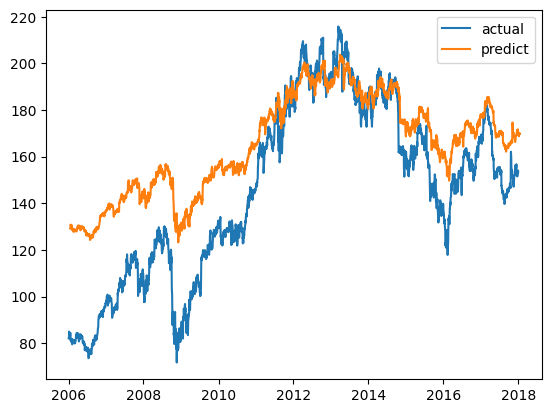

In [89]:
from datetime import datetime
from datetime import timedelta
from matplotlib import pyplot as plt

y_pred, tloss, mloss = test(model, norm_dataset, norm_dataset[15:])
y_pred_denorm = mm_scaler.scale(y_pred)

off_dates = [dt + timedelta(days=15) for dt in ibm_df['Date'].to_list()]
print(len(off_dates), len(y_pred_denorm))

plt.plot('Date', 'Close', data=ibm_df, label='actual')
plt.plot(off_dates, y_pred_denorm, label='predict')
plt.legend()

## VanillaRNN Pytorch model

/Users/n0c09jf/anaconda3/envs/pytorch/lib/python3.11/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


3019 3019


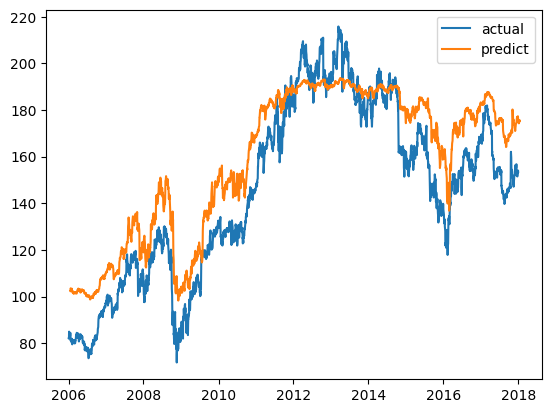

In [90]:
from datetime import datetime
from datetime import timedelta
from matplotlib import pyplot as plt

from torch.utils.data import TensorDataset

test_dataX = TensorDataset(torch.tensor(norm_dataset, dtype=torch.float32))
test_dataY = TensorDataset(torch.tensor(norm_dataset[15:], dtype=torch.float32))
y_pred, tloss, mloss = test_torch(rnnModel, test_dataX, test_dataY, H, loss_fn)
y_pred_denorm = mm_scaler.scale(y_pred)

off_dates = [dt + timedelta(days=15) for dt in ibm_df['Date'].to_list()]
print(len(off_dates), len(y_pred_denorm))

plt.plot('Date', 'Close', data=ibm_df, label='actual')
plt.plot(off_dates, y_pred_denorm, label='predict')
plt.legend()